In [1]:
from dariah_topics import preprocessing
from dariah_topics import meta
from dariah_topics import postprocessing
from dariah_topics import visualization
import lda

In [2]:
path_to_corpus = 'grenzboten_sample/*.txt'

In [3]:
metadata = meta.fn2metadata(path_to_corpus)
metadata[:5] # by adding '[:5]' to the variable, only the first 5 elements will be printed

,author,basename,filename,title
0,Beck,Beck_1844_Tagebuch_56,grenzboten_sample/Beck_1844_Tagebuch_56.txt,1844_Tagebuch_56
1,Unbekannt,Unbekannt_1844_Tagebuch_70,grenzboten_sample/Unbekannt_1844_Tagebuch_70.txt,1844_Tagebuch_70
2,Nimmer,Nimmer_1844_Tagebuch_77,grenzboten_sample/Nimmer_1844_Tagebuch_77.txt,1844_Tagebuch_77
3,Unbekannt,Unbekannt_1844_Tagebuch_82,grenzboten_sample/Unbekannt_1844_Tagebuch_82.txt,1844_Tagebuch_82
4,Jörgel,Jörgel_1844_Tagebuch_88,grenzboten_sample/Jörgel_1844_Tagebuch_88.txt,1844_Tagebuch_88


In [4]:
corpus = list(preprocessing.read_from_pathlist(metadata['filename']))
corpus[0][:255] # printing the first 255 characters of the first document

'Tagebuch von Karl Beck. Man spricht seit vierzehn Tagen von einem vollständigen Ministerwechsel und es circuliren im Publicum die verschiedensten Combinationen, wobei heute ganz andere Namen genannt werden, als gestern und morgen wieder andere, als heute.'

In [5]:
tokenized_corpus = [list(preprocessing.tokenize(document)) for document in corpus]
tokenized_corpus[0][0:13]

['tagebuch',
 'von',
 'karl',
 'beck',
 'man',
 'spricht',
 'seit',
 'vierzehn',
 'tagen',
 'von',
 'einem',
 'vollständigen',
 'ministerwechsel']

In [6]:
document_term_matrix = preprocessing.create_document_term_matrix(tokenized_corpus, metadata['title'])
document_term_matrix[:5]

,die,der,und,in,den,von,zu,das,des,nicht,...,staatsmonopol,steigernde,staatspapieren,staatsrücksichten,staatszeitung,stallknecht,stammen,starkem,statu,subscriben
1844_Tagebuch_56,90.0,92.0,84.0,70.0,30.0,26.0,25.0,16.0,25.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1844_Tagebuch_70,205.0,224.0,193.0,133.0,78.0,64.0,112.0,86.0,45.0,67.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1844_Tagebuch_77,181.0,153.0,141.0,98.0,55.0,59.0,72.0,59.0,44.0,41.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1844_Tagebuch_82,213.0,207.0,169.0,128.0,85.0,86.0,79.0,80.0,66.0,67.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1844_Tagebuch_88,68.0,59.0,70.0,54.0,22.0,27.0,28.0,19.0,13.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
stopwords = preprocessing.find_stopwords(document_term_matrix, most_frequent_tokens=100)

In [8]:
hapax_legomena = preprocessing.find_hapax_legomena(document_term_matrix)
print("Total number of types in corpus:", document_term_matrix.shape[1])
print("Total number of hapax legomena:", len(hapax_legomena))

Total number of types in corpus: 24451
Total number of hapax legomena: 19757


In [9]:
path_to_stopwordlist = 'tutorial_supplementals/stopwords/de.txt'
external_stopwords = [line.strip() for line in open(path_to_stopwordlist, 'r', encoding='utf-8')]

In [10]:
features = stopwords + hapax_legomena + external_stopwords
document_term_matrix = preprocessing.remove_features(features, document_term_matrix=document_term_matrix)

In [11]:
vocabulary = document_term_matrix.columns
vocabulary

Index(['franzosen', 'genommen', 'abgewiesen', 'südlich', 'berlin', 'lassen',
       'geschütze', 'englische', 'januar', 'deutschland',
       ...
       'bankprojects', 'ii&gt', 'pflanzenausstellung', 'unbekümmert', 'nischt',
       'thiaumont-walde', 'kompositionen', 'monarchischer', 'ehrenwerthen',
       'zaturcy'],
      dtype='object', length=4242)

In [12]:
document_term_matrix_arr = document_term_matrix.as_matrix().astype(int)
document_term_matrix_arr

array([[ 0,  1,  0, ...,  0,  0,  0],
       [ 2,  1,  0, ...,  0,  0,  0],
       [ 0,  1,  0, ...,  0,  0,  0],
       ...,
       [12, 17, 11, ...,  0,  0,  0],
       [12,  6,  9, ...,  0,  0,  0],
       [ 6,  6, 19, ...,  0,  0,  0]])

In [14]:
%%time

model = lda.LDA(n_topics=10, n_iter=50)
model.fit(document_term_matrix_arr)

CPU times: user 1.13 s, sys: 0 ns, total: 1.13 s
Wall time: 1.13 s


In [15]:
topics = postprocessing.show_topics(model=model,
                                    vocabulary=vocabulary)
topics

,Key 0,Key 1,Key 2,Key 3,Key 4,Key 5,Key 6,Key 7,Key 8,Key 9
Topic 0,oesterreich,welt,scheint,namen,sehen,berliner,geschichte,heißt,sprache,censur
Topic 1,deutschland,weise,frankreich,deutscher,französischen,letzten,sogar,halten,england,österreichischen
Topic 2,geschütze,genommen,märz,feindliche,abgeschlagen,franzosen,östlich,september,verlusten,gestürmt
Topic 3,lassen,art,berlin,nämlich,zeitung,glauben,gesellschaft,könig,zeitungen,guten
Topic 4,abgewiesen,südlich,juli,nördlich,englische,januar,april,stellungen,angriff,kriegstagebuch
Topic 5,leben,preußen,wiener,steht,gewiß,paris,publicum,fast,läßt,volk
Topic 6,franzosen,russischen,mehrere,berlin,stellung,la,gebracht,genommen,österreichische,amt
Topic 7,finden,weiß,hiesigen,sagen,seite,wissen,regierung,presse,alten,bringen
Topic 8,stadt,stück,dinge,königs,ungarn,trotz,fürsten,druck,personen,verlag
Topic 9,wien,leipzig,ward,geben,polen,kunst,namentlich,interesse,rede,verfasser


In [16]:
document_topics = postprocessing.show_document_topics(model=model,
                                                      topics=topics,
                                                      document_labels=metadata['title'])
document_topics

title,1844_Tagebuch_56,1844_Tagebuch_70,1844_Tagebuch_77,1844_Tagebuch_82,1844_Tagebuch_88,1845_Tagebuch_52,1845_Tagebuch_62,1845_Tagebuch_81,1845_Tagebuch_85,1845_Tagebuch_93,...,1915_Kriegstagebuch_33,1915_Kriegstagebuch_39,1915_Kriegstagebuch_73,1915_Kriegstagebuch_94,1915_Kriegstagebuch_99,1916_Kriegstagebuch_41,1916_Kriegstagebuch_48,1916_Kriegstagebuch_49,1916_Kriegstagebuch_69,1916_Kriegstagebuch_81
oesterreich welt scheint,0.205000,0.162106,0.192211,0.121060,0.204042,0.115084,0.167870,0.138618,0.122896,0.147974,...,0.000985,0.000151,0.000212,0.000332,0.000179,0.000160,0.000156,0.000123,0.000133,0.000136
deutschland weise frankreich,0.093710,0.104729,0.149184,0.096861,0.066960,0.105953,0.093521,0.118643,0.126032,0.120965,...,0.006356,0.006193,0.000212,0.000332,0.000179,0.000160,0.003271,0.005031,0.000133,0.017872
geschütze genommen märz,0.000161,0.000063,0.000074,0.002027,0.000176,0.000037,0.000053,0.000042,0.000052,0.000064,...,0.330439,0.373263,0.351907,0.478738,0.237679,0.299840,0.345950,0.397669,0.425467,0.268895
lassen art berlin,0.255000,0.189849,0.145475,0.160955,0.142531,0.151607,0.167870,0.181065,0.166283,0.204566,...,0.003671,0.000151,0.000212,0.000332,0.000179,0.009776,0.003271,0.000123,0.000133,0.000136
abgewiesen südlich juli,0.003387,0.000063,0.001558,0.000065,0.000176,0.000037,0.000053,0.001290,0.002666,0.001350,...,0.534557,0.486556,0.470551,0.399003,0.507321,0.644391,0.542212,0.554724,0.501467,0.660437
leben preußen wiener,0.079194,0.197415,0.126929,0.186462,0.225132,0.199087,0.136537,0.132792,0.135964,0.120965,...,0.003671,0.007704,0.000212,0.003654,0.007321,0.000160,0.000156,0.000123,0.000133,0.004229
franzosen russischen mehrere,0.040484,0.029067,0.038650,0.017070,0.021265,0.040942,0.030855,0.051644,0.016257,0.027074,...,0.104834,0.108912,0.142161,0.116611,0.246607,0.043429,0.085826,0.033252,0.066800,0.045157
finden weiß hiesigen,0.092097,0.139407,0.146217,0.127600,0.102109,0.141746,0.192300,0.164419,0.151647,0.176270,...,0.000090,0.000151,0.000212,0.000332,0.000179,0.000160,0.000156,0.001350,0.000133,0.000136
stadt stück dinge,0.150161,0.035372,0.120994,0.160955,0.156591,0.091344,0.080775,0.082022,0.139624,0.057299,...,0.015309,0.016767,0.029873,0.000332,0.000179,0.001763,0.018847,0.007485,0.002800,0.002865
wien leipzig ward,0.080806,0.141929,0.078709,0.126946,0.081019,0.154164,0.130165,0.129463,0.138578,0.143473,...,0.000090,0.000151,0.004449,0.000332,0.000179,0.000160,0.000156,0.000123,0.002800,0.000136


In [17]:
topic_key_weights = postprocessing.show_topic_key_weights(topic_no=1,
                                                          num_keys=30,
                                                          model=model,
                                                          vocabulary=vocabulary,
                                                          sort_ascending=False)
topic_key_weights[:5]

deutschland      0.021734
weise            0.019879
frankreich       0.018553
französischen    0.013783
leben            0.001858
dtype: float64

# Visualizations

Two functions, one class:
* `plot_wordcloud()`
* `plot_key_frequencies()`
* `PlotDocumentTopics` visualizes everything related to document-topics proportions.

### `plot_wordcloud()`

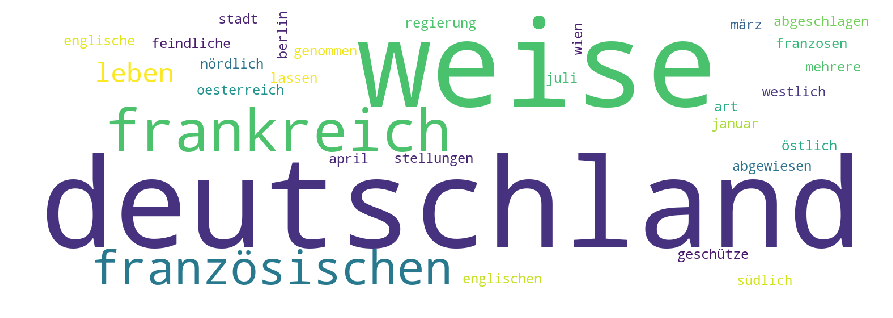

In [18]:
wordcloud = visualization.plot_wordcloud(weights=topic_key_weights,
                                         background_color='white',
                                         width=1500,
                                         height=500,
                                         enable_notebook=True)

### `plot_key_frequencies()`

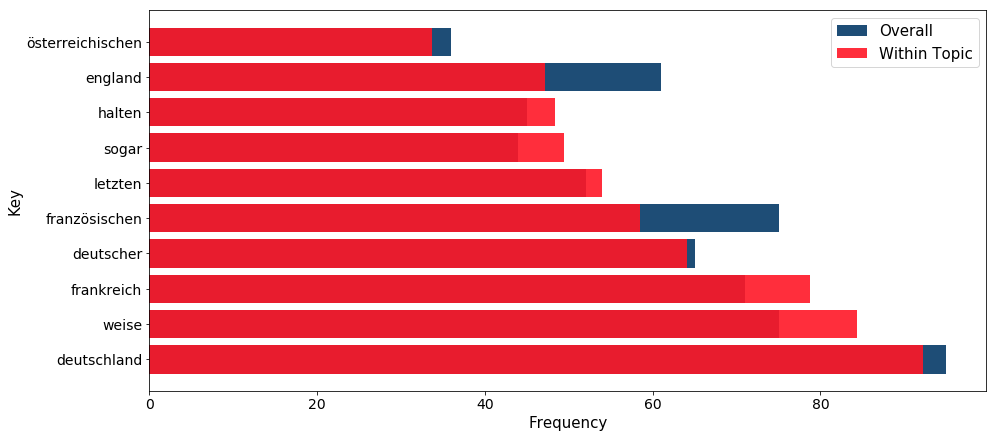

In [19]:
key_frequencies = visualization.plot_key_frequencies(document_term_matrix=document_term_matrix,
                                                     vocabulary=vocabulary,
                                                     model=model,
                                                     topic_no=1,
                                                     num_keys=10,
                                                     enable_notebook=True)

### `PlotDocumentTopics`

In [20]:
PlotDocumentTopics = visualization.PlotDocumentTopics(document_topics,
                                                      enable_notebook=True)

Loading BokehJS ...

### Wenn `enable_notebook=True`

```python
@staticmethod
def notebook_handling():
    from IPython import get_ipython
    get_ipython().run_line_magic('matplotlib', 'inline')
    from bokeh.io import output_notebook, show
    output_notebook()
    return show
```

### `static_heatmap`

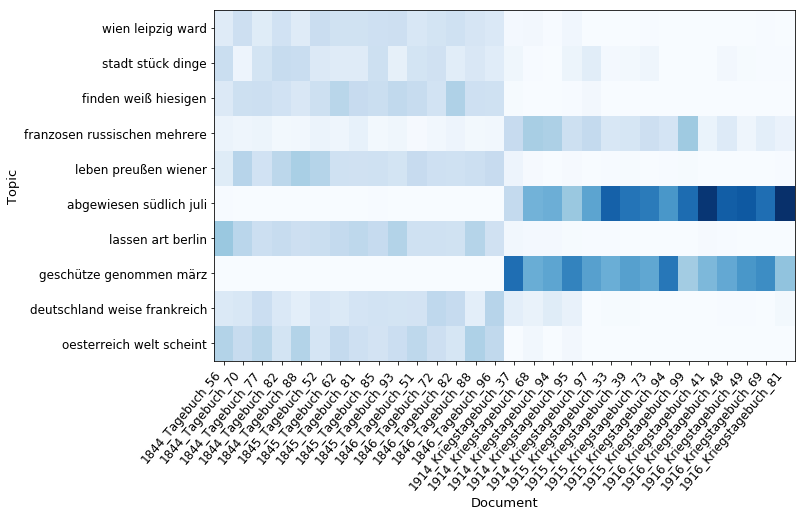

In [21]:
static_heatmap = PlotDocumentTopics.static_heatmap(colorbar=False)

### `static_barchart_per_topic`

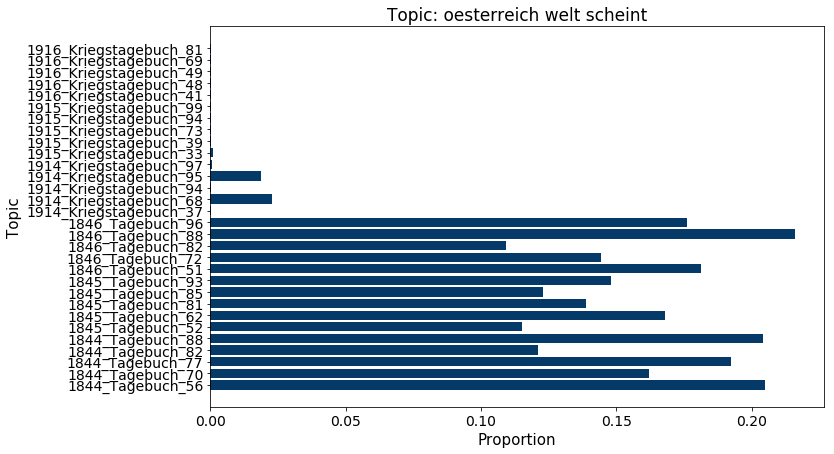

In [22]:
static_barchart_per_topic = PlotDocumentTopics.static_barchart_per_topic(index=0, # or index='abgewiesen südlich genommen'
                                                                         describer='Topic',
                                                                         alpha=None,
                                                                         figsize=(11, 7))

### `static_barchart_per_document`

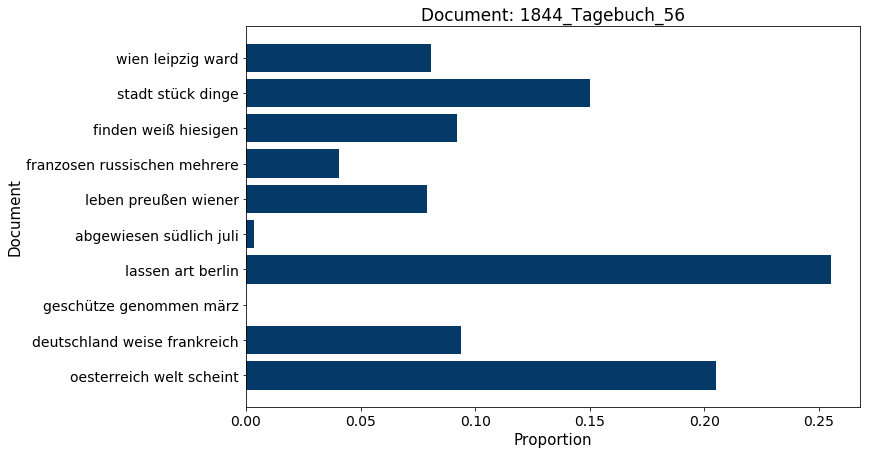

In [23]:
static_barchart_per_document = PlotDocumentTopics.static_barchart_per_document(index=0,
                                                                               describer='Document')

### `interactive_heatmap`

In [27]:
interactive_heatmap = PlotDocumentTopics.interactive_heatmap(width=800,
                                                             height=550,
                                                             colorbar=False)

### `interactive_barchart_per_topic`

In [25]:
interactive_barchart_per_topic = PlotDocumentTopics.interactive_barchart_per_topic(index=0,
                                                                                   describer='Topic',
                                                                                   width=800)

### `interactive_barchart_per_document`

In [26]:
interactive_barchart_per_document = PlotDocumentTopics.interactive_barchart_per_document(index=0,
                                                                                         describer='Document',
                                                                                         width=800)

### `to_file`

```python
@staticmethod
def to_file(fig, filename):
    import matplotlib
    import bokeh
    if isinstance(fig, bokeh.plotting.figure.Figure):
        ext = os.path.splitext(filename)[1]
        if ext == '.png':
            export_png(fig, filename)
        elif ext == '.svg':
            fig.output_backend = 'svg'
            export_svgs(fig, filename)
        elif ext == '.html':
            output_file(filename)
    elif isinstance(fig, matplotlib.figure.Figure):
         fig.savefig(filename)
```

## Von Riddell-Tutorial importieren?

<img src="https://de.dariah.eu/tatom/_images/plot_word_topic.png" width="700px">